In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')

In [3]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
X = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,-1].values

In [14]:
# y

In [7]:
trainX, testX, trainY, testY = train_test_split(X,y,test_size=0.2)

In [8]:
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(320, 2)
(80, 2)
(320,)
(80,)


In [10]:
sc = StandardScaler()
trainX = sc.fit_transform(trainX)
testX = sc.fit_transform(testX)

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [25]:
clf = SVC(kernel='linear')
clf.fit(trainX,trainY)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [26]:
y_pred = clf.predict(testX)

In [27]:
y_pred

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [28]:
accuracy_score(y_pred, testY)

0.875

In [29]:
from matplotlib.colors import ListedColormap

In [30]:
set_x, set_y = trainX, trainY

xx, yy = np.meshgrid(np.arange(set_x[:,0].min() - 1, set_x[:,0].max() + 1, step=0.01),
                    np.arange(set_x[:,1].min() - 1, set_x[:,1].max() + 1, step=0.01))

z = clf.predict(np.array([xx.ravel(), yy.ravel()]).T).reshape(xx.shape)


In [33]:
len(xx)

600

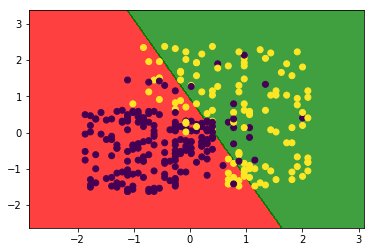

In [35]:
# alpha - opacity
# ListedColorMap - set color for features
plt.contourf(xx, yy, z, alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(),yy.max())

plt.scatter(trainX[:,0],trainX[:,1],c=trainY)
    
plt.show()    